In [189]:
#Git Hub link:
#https://github.com/christacaggiano/machine_learning_exercises/blob/main/chest_pain_prediction.ipynb
import pandas as pd 
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.pipeline import make_pipeline



In [3]:
cleanedDf = pd.read_csv("combinedMetaData.csv", delimiter=",")
expressionData = pd.read_csv("combinedExpressionData.csv", delimiter=",")

In [4]:
cleanedDf



,!Sample_geo_accession,Gender,Age,Allergy,Asthma,Dermatitis,rhinitis
0,GSM4209620,1,195.559200,1,0,1,0
1,GSM4209621,1,204.046100,0,0,0,0
2,GSM4209622,0,201.677600,1,1,1,0
3,GSM4209623,1,205.625000,1,1,0,0
4,GSM4209624,0,202.894700,0,0,0,0
...,...,...,...,...,...,...,...
452,GSM4210249,1,55.162218,1,0,1,0
453,GSM4210250,0,47.460000,0,0,0,0
454,GSM4210251,0,47.610000,1,1,1,0
455,GSM4210252,1,48.030000,0,0,0,0


In [5]:
expressionData



,TC01000001.hg.1,TC01000002.hg.1,TC01000003.hg.1,TC01000004.hg.1,TC01000005.hg.1,TC01000006.hg.1,TC01000007.hg.1,TC01000008.hg.1,TC01000009.hg.1,TC01000010.hg.1,...,TCUn_gl000228000012.hg.1,TCUn_gl000228000013.hg.1,TCUn_gl000228000014.hg.1,TCUn_gl000237000001.hg.1,TCUn_gl000237000002.hg.1,TCUn_gl000241000001.hg.1,TCUn_gl000241000002.hg.1,TCUn_gl000243000001.hg.1,TCUn_gl000243000002.hg.1,TCUn_gl000247000001.hg.1
0,7.429823,4.388578,2.371792,5.275303,9.702489,11.799802,12.070954,6.996882,1.614111,3.492010,...,2.657722,6.307265,4.691915,6.020328,5.831065,5.642116,5.795866,6.400864,6.347468,6.400864
1,6.185963,4.001252,1.935577,6.272907,10.218112,11.969852,12.667002,8.177514,1.529896,3.043273,...,3.153498,6.036182,4.904974,5.684232,5.599217,5.592368,5.775740,5.094467,6.672159,5.094467
2,7.825112,4.261002,2.641741,5.066341,9.856455,11.973046,12.180124,7.075101,2.286690,3.299668,...,2.677549,6.229489,4.804676,5.898304,5.818457,5.232601,5.374681,3.737465,6.181059,3.737465
3,5.970286,4.018165,1.942758,5.142228,10.081747,12.224622,12.343981,8.123771,1.429856,3.175787,...,2.634139,6.276416,5.101769,5.800389,5.764109,5.830511,5.962839,5.765790,6.613098,5.765790
4,5.057495,4.067344,1.857217,5.073486,9.537027,11.809516,12.237580,7.427976,1.512572,3.546307,...,2.637874,6.438287,5.226228,5.960240,5.819446,5.534489,5.722457,5.056717,6.293271,5.056717
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452,5.527936,4.002118,2.278531,5.083149,9.565384,11.763449,12.118517,6.462258,2.399203,2.531245,...,2.696852,5.885239,4.926349,6.004389,5.862836,5.498271,5.656748,5.798111,6.143411,5.798111
453,6.668984,4.181611,2.097783,5.169271,10.631013,12.586666,12.811188,8.393369,1.594771,3.010067,...,2.481113,6.154615,5.333989,5.995378,5.824136,5.715451,5.620531,4.353498,6.443935,4.353498
454,6.200409,4.010727,2.081174,5.139554,10.735875,12.433690,12.796228,8.091158,1.577341,2.626457,...,2.430607,5.735970,5.485750,5.509612,5.439530,5.832331,5.876333,5.765355,6.508409,5.765355
455,5.773160,4.117694,1.975119,5.238750,9.679538,11.831524,12.202237,7.339840,1.744914,2.584541,...,2.744594,5.921594,4.818642,5.910719,5.993389,6.076282,6.108007,6.091670,6.112285,6.091670


In [6]:
y = cleanedDf["Allergy"].values
x = expressionData.values

In [205]:
x = normalize(x)

In [206]:
"""pca = PCA(n_components=400)
fit = pca.fit_transform(x)
pca_x = pd.DataFrame(fit)"""





'pca = PCA(n_components=400)\nfit = pca.fit_transform(x)\npca_x = pd.DataFrame(fit)'

In [209]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.3, random_state=0)

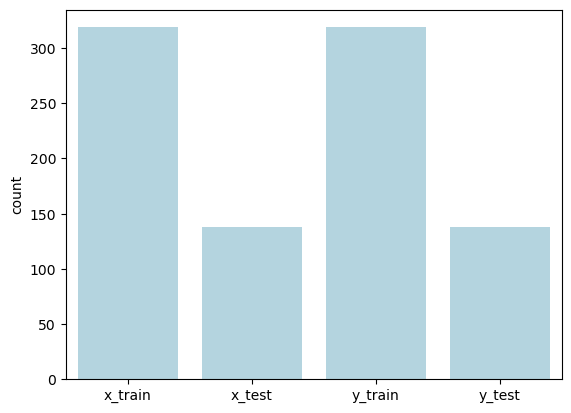

In [210]:
#plot training and testing data
sns.barplot(x=["x_train", "x_test", "y_train", "y_test"], 
            y=[len(x_train), len(x_test), len(y_train), len(y_test)],
           color="lightblue")
plt.ylabel("count")
plt.show()

In [236]:
lr = LogisticRegression(penalty='elasticnet', solver='saga',l1_ratio=0.5)



In [237]:
x_train

array([[-1.89948854e-03, -5.59894505e-03, -7.68038025e-04, ...,
         3.09235311e-03, -2.56418519e-03,  3.09235311e-03],
       [ 8.47552637e-04,  5.71537261e-05, -5.04442053e-04, ...,
        -1.17096224e-03, -4.41133518e-03, -1.17096224e-03],
       [-7.09138938e-03,  9.85840396e-04, -8.18637183e-06, ...,
        -1.32581896e-02,  1.77625756e-03, -1.32581896e-02],
       ...,
       [-3.20352880e-03, -3.17639129e-03,  6.91106516e-03, ...,
         5.37274430e-03, -3.84602927e-03,  5.37274430e-03],
       [-1.48780154e-03, -9.03415557e-04,  1.02080232e-02, ...,
         5.81224739e-03, -2.93776910e-03,  5.81224739e-03],
       [-6.66458754e-03,  2.82941723e-03, -5.86291111e-03, ...,
        -5.48287736e-03,  2.33609910e-03, -5.48287736e-03]])

In [238]:
lr.fit(x_train,y_train)



LogisticRegression(l1_ratio=0.5, penalty='elasticnet', solver='saga')

In [239]:
x_train.shape

(319, 67528)

In [240]:
y_train.shape

(319,)

In [241]:
y_pred = lr.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

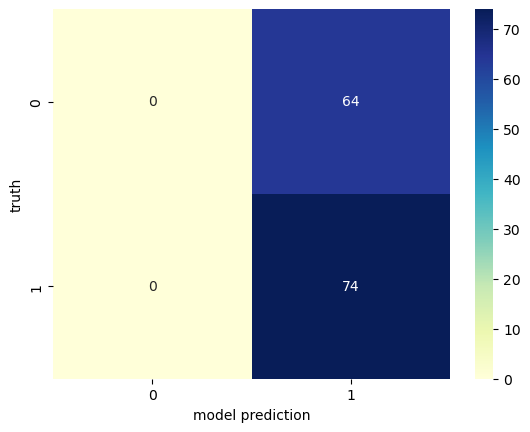

In [242]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred) 
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu")
plt.xlabel("model prediction")
plt.ylabel("truth")
plt.show() 

In [227]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.41      0.58      0.48        45
           1       0.74      0.59      0.66        93

    accuracy                           0.59       138
   macro avg       0.57      0.58      0.57       138
weighted avg       0.63      0.59      0.60       138



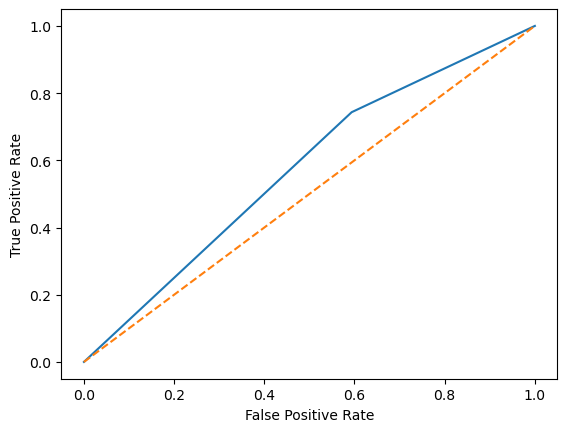

In [228]:
fpr, tpr, _ = roc_curve(y_test,  y_pred)

plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1], linestyle="dashed")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [229]:
roc_auc_score(y_test, y_pred)

0.5747466216216216